In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-22 16:54:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-22 16:54:54 (85.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir, load_and_prep_image, pred_and_plot

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
unzip_data('pizza_steak.zip')

--2024-05-22 13:03:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 108.177.120.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   142MB/s    in 0.7s    

2024-05-22 13:03:09 (142 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
walk_through_dir('pizza_steak')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=int(0.25*len(valid_data)),
                        verbose=1)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 149ms/step - loss: 0.6086 - accuracy: 0.6273 - val_loss: 0.4514 - val_accuracy: 0.8125
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4344 - accuracy: 0.8020 - val_loss: 0.3683 - val_accuracy: 0.8281
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4109 - accuracy: 0.8227 - val_loss: 0.3588 - val_accuracy: 0.8047
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.3571 - accuracy: 0.8487 - val_loss: 0.3143 - val_accuracy: 0.8203
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3495 - accuracy: 0.8567 - val_loss: 0.3366 - val_accuracy: 0.8672


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 110ms/step - loss: 0.3435 - accuracy: 0.8560


[0.34351643919944763, 0.8560000061988831]

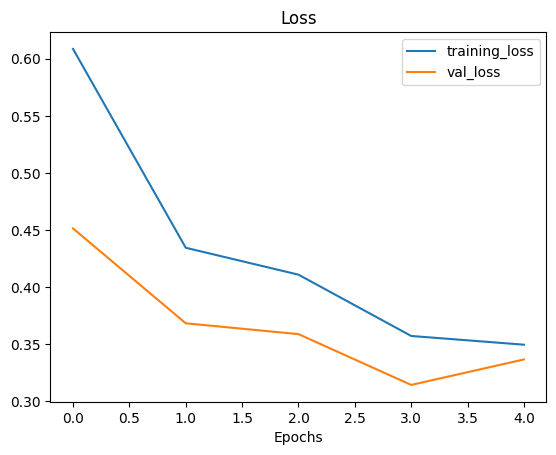

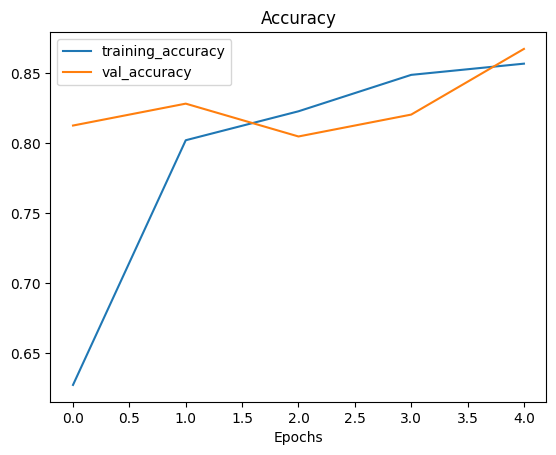

In [ ]:
plot_loss_curves(history_1)

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


1/1 [==============================] - 0s 291ms/step


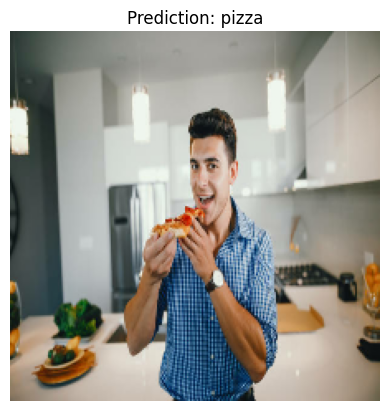

In [ ]:
pred_and_plot(model_1, 'pizza2.jpg', class_names=class_names)

1/1 [==============================] - 0s 18ms/step


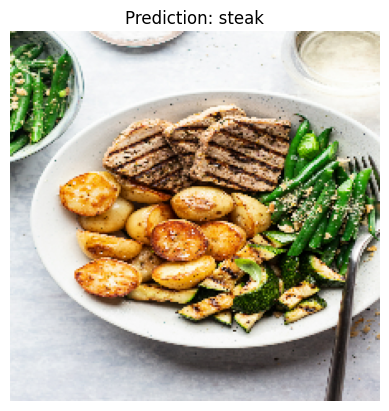

In [ ]:
pred_and_plot(model_1, 'predict.jpg', class_names=class_names)

1/1 [==============================] - 0s 19ms/step


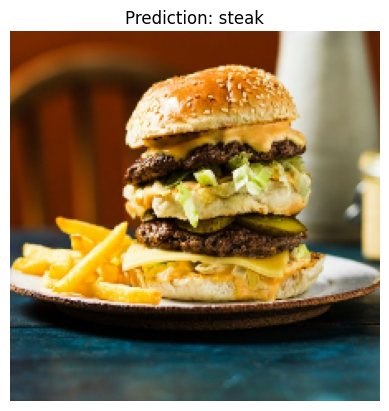

In [ ]:
pred_and_plot(model_1, 'predict2.jpg', class_names=class_names)

# Different binary dataset same architecture

In [ ]:
!kaggle datasets download -d bmadushanirodrigo/x-ray-and-non-x-ray-image-classification-data

Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/x-ray-and-non-x-ray-image-classification-data
License(s): CC0-1.0
 98% 98.0M/99.7M [00:07<00:00, 17.8MB/s]
100% 99.7M/99.7M [00:07<00:00, 14.4MB/s]


In [ ]:
unzip_data('x-ray-and-non-x-ray-image-classification-data.zip')

In [ ]:
walk_through_dir('Xray_Classifier')

There are 1 directories and 0 images in 'Xray_Classifier'.
There are 3 directories and 0 images in 'Xray_Classifier/Xray_Classifier'.
There are 2 directories and 0 images in 'Xray_Classifier/Xray_Classifier/val'.
There are 0 directories and 621 images in 'Xray_Classifier/Xray_Classifier/val/non_xray'.
There are 0 directories and 565 images in 'Xray_Classifier/Xray_Classifier/val/xray'.
There are 2 directories and 0 images in 'Xray_Classifier/Xray_Classifier/train'.
There are 0 directories and 621 images in 'Xray_Classifier/Xray_Classifier/train/non_xray'.
There are 0 directories and 565 images in 'Xray_Classifier/Xray_Classifier/train/xray'.
There are 2 directories and 0 images in 'Xray_Classifier/Xray_Classifier/test'.
There are 0 directories and 551 images in 'Xray_Classifier/Xray_Classifier/test/non_xray'.
There are 0 directories and 565 images in 'Xray_Classifier/Xray_Classifier/test/xray'.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'Xray_Classifier/Xray_Classifier/train/'
valid_dir = 'Xray_Classifier/Xray_Classifier/val/'
test_dir = 'Xray_Classifier/Xray_Classifier/test/'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)



model_faces = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_faces.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_faces = model_faces.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose=1)

Found 1185 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.
Epoch 1/5
38/38 [==============================] - 12s 225ms/step - loss: 0.2410 - accuracy: 0.8886 - val_loss: 0.0218 - val_accuracy: 0.9966
Epoch 2/5
38/38 [==============================] - 6s 168ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0064 - val_accuracy: 0.9983
Epoch 3/5
38/38 [==============================] - 8s 207ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0149 - val_accuracy: 0.9975
Epoch 4/5
38/38 [==============================] - 9s 230ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/5
38/38 [==============================] - 8s 224ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9983


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

model_faces.evaluate(test_data)

Found 1115 images belonging to 2 classes.
35/35 [==============================] - 4s 100ms/step - loss: 0.0033 - accuracy: 0.9982


[0.0033298975322395563, 0.9982062578201294]

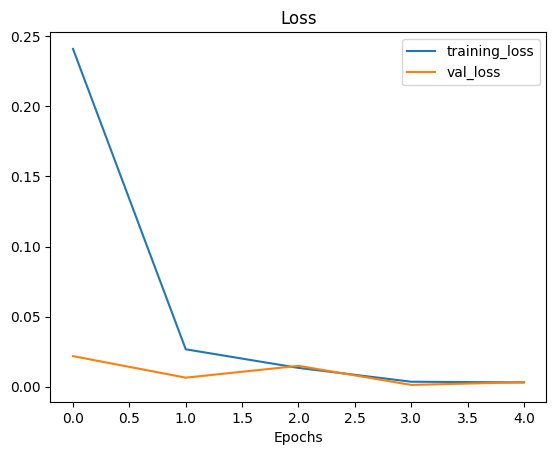

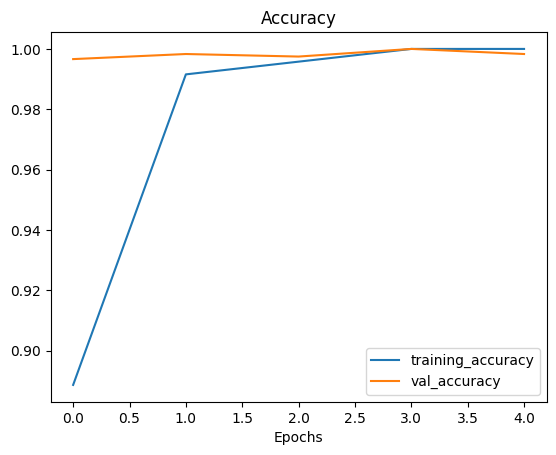

In [ ]:
plot_loss_curves(history_faces)

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['non_xray' 'xray']


1/1 [==============================] - 0s 113ms/step


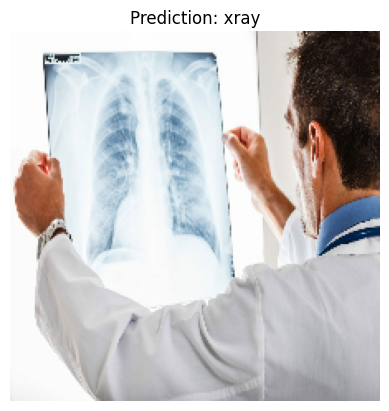

In [ ]:
pred_and_plot(model_faces, 'test_photo1.jpg', class_names=class_names)